<a href="https://colab.research.google.com/github/ChuquEmeka/ARTIFICIAL-NEURAL-NETWORKS/blob/main/concrete_strength_prediction_using_ann_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONCRETE STRENGTH PREDICTION USING ARTIFICIAL NEURAL NETWORKS PRESENTED BY:
### EDEH EMEKA N.


##### **In this Analysis, I will be predicting the strength of concrete using the given eight features that describe the components used in the mixture.These features are believed to be related to the final compressive strength which include the amount of cement in Kilograms per cubic meter, Blast.Furnace.Slag, Fly.Ash, water,superplasticizer, coarse aggregate, fine aggregate and aging period measured in days.**

##### **The dataset was donated to UCI Machine Learning Data Repository by I-Cheng Yeh**

## Data Exploration and Preparation

In [1]:
concrete <- read.csv("concrete_data.csv")

In [2]:
str(concrete)

'data.frame':	1030 obs. of  9 variables:
 $ Cement            : num  540 540 332 332 199 ...
 $ Blast.Furnace.Slag: num  0 0 142 142 132 ...
 $ Fly.Ash           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Water             : num  162 162 228 228 192 228 228 228 228 228 ...
 $ Superplasticizer  : num  2.5 2.5 0 0 0 0 0 0 0 0 ...
 $ Coarse.Aggregate  : num  1040 1055 932 932 978 ...
 $ Fine.Aggregate    : num  676 676 594 594 826 ...
 $ Age               : num  28 28 270 365 360 90 365 28 28 28 ...
 $ Strength          : num  80 61.9 40.3 41 44.3 ...


**ANNs work better when the input data are scaled to a narrow range around zero. From the above outcome, this is not the case. I will have to normalize/rescale/standardize the values after checking for missing values.**

In [3]:
#i will check for missing values
 sapply(concrete, function(x) sum(is.na (x)))

Cement Blast.Furnace.Slag            Fly.Ash              Water 
                 0                  0                  0                  0 
  Superplasticizer   Coarse.Aggregate     Fine.Aggregate                Age 
                 0                  0                  0                  0 
          Strength 
                 0

In [4]:
#I am going to use the normalization function below
normalize <- function(x) {
    return((x-min(x)) / (max(x)-min(x)))
}

In [5]:
#Now, i will apply the normalize() to all the columns
norm_concrete <- as.data.frame(lapply(concrete, normalize))

In [6]:
summary(norm_concrete$Strength)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2664  0.4001  0.4172  0.5457  1.0000 

In [7]:
head(norm_concrete)

,Cement,Blast.Furnace.Slag,Fly.Ash,Water,Superplasticizer,Coarse.Aggregate,Fine.Aggregate,Age,Strength
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0000000,0.0000000,0,0.3210863,0.07763975,0.6947674,0.2057200,0.07417582,0.9674847
2,1.0000000,0.0000000,0,0.3210863,0.07763975,0.7383721,0.2057200,0.07417582,0.7419958
3,0.5262557,0.3964942,0,0.8482428,0.00000000,0.3808140,0.0000000,0.73901099,0.4726548
4,0.5262557,0.3964942,0,0.8482428,0.00000000,0.3808140,0.0000000,1.00000000,0.4823720
5,0.2205479,0.3683918,0,0.5607029,0.00000000,0.5156977,0.5807827,0.98626374,0.5228603
6,0.3744292,0.3171953,0,0.8482428,0.00000000,0.3808140,0.1906673,0.24450549,0.5568706


**My values have all been normalized to values between 0 and 1.**

## Model Training

**Since this dataset is already sorted in a random order, i will be dividing it into train and test data using the first 75% as train and the remaining 25% as test data.**

In [8]:
concrete_train <- norm_concrete[1:773,]
concrete_test <- norm_concrete[774:1030,]

**To train the model, I am going to use a multilayer feedforward neural network known as neuralnet package provided by Frauke Guenther**

In [9]:
install.packages("neuralnet")
library("neuralnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




In [ ]:
#concrete_model <- neuralnet(Strength ~ ., data = concrete_train)

In [10]:
concrete_model <- neuralnet(Strength ~ Cement + Blast.Furnace.Slag + Fly.Ash + Water
                            + Superplasticizer + Coarse.Aggregate + Fine.Aggregate + Age,
                           data = concrete_train)

In [11]:
plot(concrete_model)

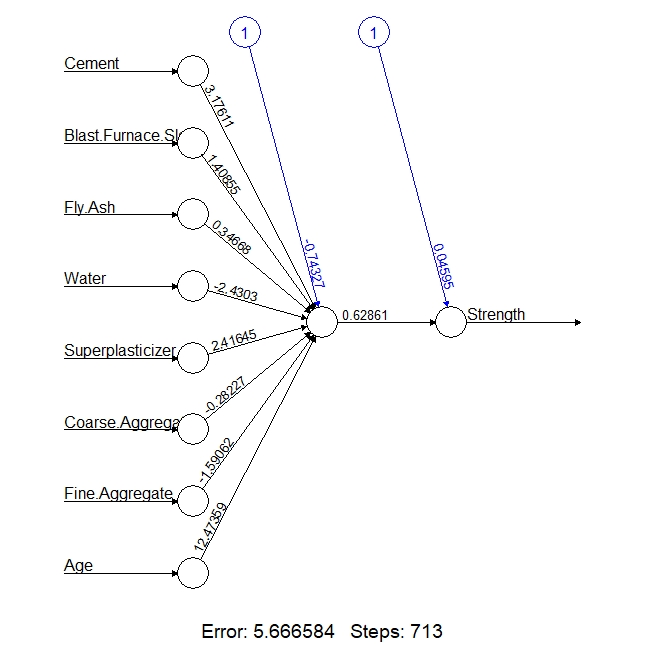![neural network plot.jpeg](attachment:620a86c1-6ee1-49fe-8cf3-a9e347093a60.jpeg)

**The model is reporting a sum of squarred error as 5.666584 with 713 steps taken. The lower the SSE, the better the predictive performance.**

## MODEL PERFORMANCE EVALUATION

**To generate predictions on the test dataset, i will use the compute() function which is a bit different from the predict() function we usually use for other algorithms. The compute function returns two components; $neurons, which stores the neurons from each layer in the network, and $net.result, which stores the predicted values. I am interested in the predicted values** 

In [12]:
model_results <- compute(concrete_model, concrete_test[1:8])

In [13]:
predicted_strength <- model_results$net.result


**Because this a numeric prediction and not classification problem, i will use cor() function and not confusion matrix to examine the model accuracy. I will measure the correlation between the predicted concrete_strength value and the actual value. This will help me with insight into the strength of the liner relationship between the two variables.**

In [14]:
cor(predicted_strength, concrete_test$Strength)

0.7097468


**A correlation of 0.71 indicates a fairly strong positive rellationship between the two variables**

## MODEL PERFORMANCE IMPROVEMENT

**Given that i only used one hidden node, i can still attempt to improve the model performance by increasing the number of hidden nodes to 5.**

In [15]:
concrete_model2 <- neuralnet(Strength ~ Cement + Blast.Furnace.Slag + Fly.Ash + Water
                            + Superplasticizer + Coarse.Aggregate + Fine.Aggregate + Age,
                           data = concrete_train, hidden = 5)

In [16]:
plot(concrete_model2)

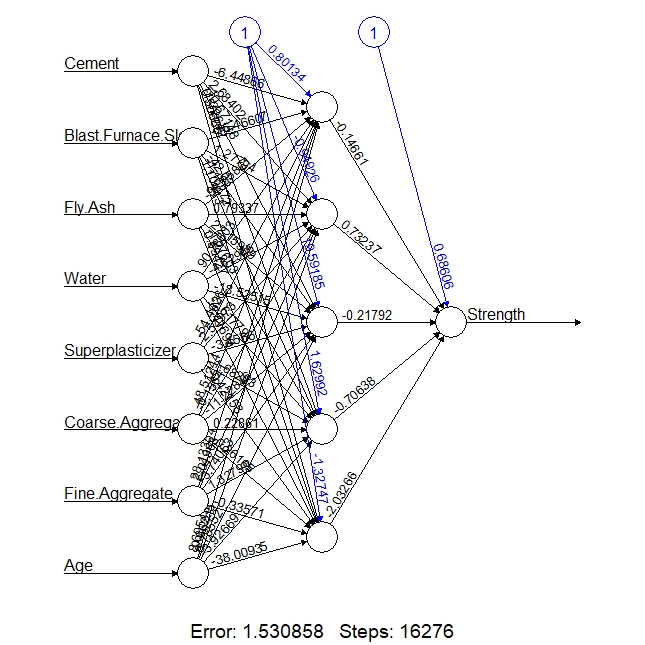

**The error has reduced to 1.53 with a larger steps of 16276 after increasing the number of hidden nodes. The model performance has greatly been improved.**

**Again, i will use cor() function to examine the improved model accuracy. I will measure the correlation between the second predicted concrete_strength value and the actual value.**

In [17]:
model_results2 <- compute(concrete_model2, concrete_test[1:8])
predicted_strength2 <- model_results2$net.result
cor(predicted_strength2, concrete_test$Strength)

0.8179359


#### **After the model improvement, it is evident that the correlation  between the predicted concrete strenght and the actual strength has increased to 0.81, indicating a better predictive model.**